# Binary Classification

Binary classification is a problem when you want to clasify your target value into two categories. Regression model gives us any number as an output but binary classification model should give us only 0 or 1.

## One-Variable

The most basic binary classification is when you have only one feature: $(x, y)$ and $n$ data point where each $y$ is $0$ or $1$.

We can solve binary classification problem with linear regression: We'll choose some threshold (for example $0.3$) and if linear regression model predicts some number above this threshold, we'll asume that the result is $1$, else - $0$. This method isn't very precise so we have new model - __Logistic Regression__.

Using logistic regression we get probability that this data point belongs to positive class ($1$). This is why it's called regression - it generated some probability, number between $0$ and $1$ but this algorithm is used to solve classification problems.

The main goal for this model is to minimize weights $w = (w_0, w_1)$ and it uses __gradient descent__ algorithm for this but we have different cost function and hypothesis function. Logistic regressions evaluates probability like this:
$$p(x) = \sigma(z_x) =  \frac{1}{(1 + e^{-z_x})}$$ where $z_x = w_0 + w_1 x$. 

$\sigma(x)$ - is a sigmoid function. Values of this function are in range $0 - 1$ and it doesn't need any manipulation to get probability, it's probability itself. 

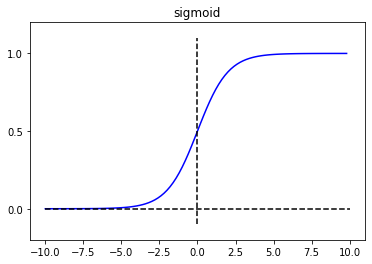

In [2]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(-10., 10., 0.2)

plt.plot(t, 1.0 / (1 + np.exp(-t)), 'b', [0, 0], [-0.1, 1.1], 'k--', [-10, 10], [0., 0.], 'k--')
plt.title('sigmoid')
plt.ylim(-0.2, 1.2)
plt.yticks([0.0, 0.5, 1.0])
plt.show()

As we want to classify our points, we need to choose some threshold, for example $0.5$. If we get probability more than threshold, we assume that it belongs to positive class, else it belongs to negative class:

$$
y^\ast = 
\begin{cases}
    0 & \text{თუ $\sigma(z_x) < 0.5$}\\
    1 & \text{თუ $\sigma(z_x) \geqslant 0.5$}
\end{cases}
$$

How do we choose threshold:
* According to a problem: 
    * If we want to predict a tumor is benign or malignant and we use it's size as a feature, most likely we want to get as few 'false negatives' as possible. We may choose $0.3$ or $0.4$ threshold value in such case.
    * If we want to classify emails as spam/not spam, we want to have 'false positives' as few as possible so in such case our threshold can be $0.7$ or $0.8$.
* trial and error - try different values and choose the best.
* Some other analytical methods.


### Cost Function

As we already said, logistic regression doesn't use mean squared error as a cost function because it's not convex anymore(because of sigmoid function) and this is a huge problem for gradient descent algorithm as it may choose local minimum point instead of global minimum. We use __logarithmic loss(log loss) or binary cross enthropy loss__ instead. 

Log loss for point $(x_i, y_i)$ can be calculated like this:

$$
J_i(w) = 
    \begin{cases}
      -\ln p(x_i) & \text{თუ $y_i = 1$}\\
      -\ln (1-p(x_i)) & \text{თუ $y_i = 0$}
    \end{cases} 
$$

We may joint it:

$$
J_i(w) = - y_i\ln p(x_i) - (1-y_i)\ln (1-p(x_i))
$$

and for the whole dataset we have average of them:

$$
J(w) = \frac{1}{n}\sum_{i=1}^{n}J_i(w) = -\frac{1}{n}\sum_{i=1}^{n} \bigg( y_i \ln p(x_i) + (1-y_i)\ln (1-p(x_i)) \bigg)
$$


Let's look how model penalties each wrong answer:

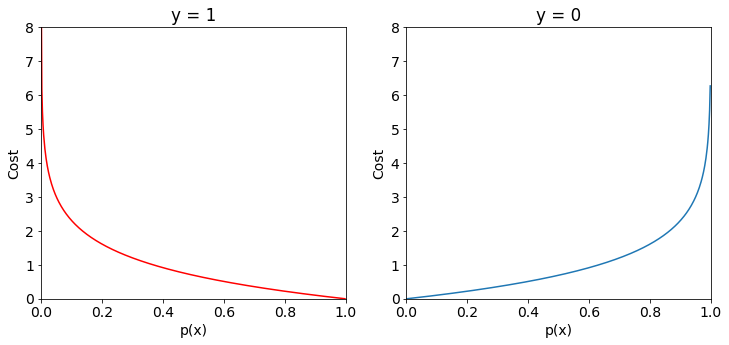

In [3]:
t = np.arange(0.0001, 1., 0.002)

plt.rcParams.update({'font.size': 14}) 

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(t, -np.log(t), 'r')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 8)
ax[0].set_title('y = 1')
ax[0].set_xlabel('p(x)')
ax[0].set_ylabel('Cost')


ax[1].plot(t, -np.log(1 - t))
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 8)
ax[1].set_title('y = 0')
ax[1].set_xlabel('p(x)')
ax[1].set_ylabel('Cost')

plt.show()

When actual class is $1$ (picture on the left) and model prediction that class is $1$ goes to $0$, value of cost function goes to infinity so model guesses that something is wrong and weights need to be changed. When  probability goes to $1$, cost goes to $0$. The same thinghappend on the second graph.

### Weight Update

Update happens using gradient descent algorithm. for epoch $j$ update process is like this:

$$
w_0^{j+1} = w_0^{j} - L \frac{\partial J(w^j) }{\partial w_0^{j}}
$$

$$
w_1^{j+1} = w_1^{j} - L \frac{\partial J(w^j) }{\partial w_1^{j}}
$$

$L$ - learning rate

Partial derivatives:

$$
\frac{\partial J(w^j) }{\partial w_0^{j}} = \frac{1}{n}\sum_{i=1}^{n} ( p(x_i) - y_i )
$$

$$
\frac{\partial J(w^j) }{\partial w_1^{j}} = \frac{1}{n}\sum_{i=1}^{n} ( p(x_i) - y_i ) x_i
$$

## Multivariable

Multivariable binary classification problem can be solved using logistic regression too. Now $x_i$ is a vector(not number) and $w = (w_0, w_1, \cdots, w_m)$ ($m$ is number of features). 

### Vectorization

We should add a column in $X$ matrix as we did in linear regression(column of $1$), so new $X$ matrix is this:

$$ 
X_{n,m+1}= 
\begin{pmatrix}
  x_{1,0} & x_{1,1} & \cdots & x_{1,m} \\
  x_{2,0} & x_{2,1} & \cdots & x_{2,m} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{n,0} & x_{n,1} & \cdots & x_{n,m} 
\end{pmatrix}
$$
  
$x_{i, 0}=1$  

so for $x$ we can write $z_x$ as: $z_x = w^Tx = x^Tw$, so the prediction looks like this:  

$$ p(x) = \sigma(z_x) = \frac{1}{1+e^{-x^Tw}} $$  

$z = Xw$

$$ p = \sigma(z) = \sigma(Xw) $$

Cost function:

$$ J(w) = -\frac{1}{n}\bigg(y^T\ln(p) + (1-y)^T\ln(1-p)\bigg) $$

becauseL

$$ J(w) = 
-\frac{1}{n}\sum_{i=1}^{n} \bigg( y_i \ln p(x_i) + (1-y_i)\ln (1-p(x_i)) \bigg) = 
-\frac{1}{n}\bigg(\sum_{i=1}^{n} y_i \ln p(x_i) + \sum_{i=1}^{n}(1-y_i)\ln (1-p(x_i))\bigg) $$

it's easy to see:

$$
\sum_{i=1}^{n} y_i \ln p(x_i) = y^T\ln(p) \\
\sum_{i=1}^{n}(1-y_i)\ln (1-p(x_i)) = (1-y)^T\ln(1-p)
$$

We need that if we want to take a look how cost function decreases during training. We need only vectorization of partial derivatives for calculations:

$$
\frac{\partial J(w)}{\partial w} = 
\frac{1}{n}X^T(p-y) = 
\frac{1}{n}X^T(\sigma(Xw)-y)
$$

Right side:

$$
\frac{\partial J(w) }{\partial w} = 
\frac{1}{n}
\begin{pmatrix}
  \sum_{i=1}^{n}(\sigma(x_i^Tw) - y_i)x_{i,0}\\
  \sum_{i=1}^{n}(\sigma(x_i^Tw) - y_i)x_{i,1}\\
  \vdots\\
  \sum_{i=1}^{n}(\sigma(x_i^Tw) - y_i)x_{i,m}\\
\end{pmatrix}
$$ 

Left side:
$$
X_{m+1,n}^T= 
\begin{pmatrix}
  x_{1,0} & x_{2,0} & \cdots & x_{n,0} \\
  x_{1,1} & x_{2,1} & \cdots & x_{n,1} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{1,m} & x_{2,m} & \cdots & x_{n,m} 
\end{pmatrix}
\\
$$  
   
$$
\sigma(Xw) - y = \begin{pmatrix}
  \sigma(x_0^Tw) - y_0 \\
  \sigma(x_1^Tw) - y_1 \\
  \vdots \\
  \sigma(x_n^Tw) - y_n 
\end{pmatrix}
$$

We have a simple equation to update weights when we are going from $j$ epoch to $j+1$:
 
$$ w^{j+1} = w^j - L \frac{1}{n}X^T(\sigma(Xw)-y) $$

Let's solve logistic regression problem with two features.
We'll use `make_classification` method from `sklearn.datasets` module to create a dataset. It needs parameters:  
* `n_samples` - number of rows
* `n_features` - number of features
* `n_redundant` - number of extra features 
* `n_clusters_per_class` - number of clusters in per class 
* `shift` - shift
* `random_state` - ensures that the function returns the same result for each run



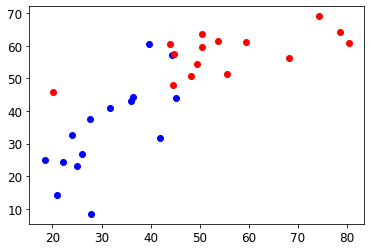

In [4]:
from sklearn.datasets import make_classification

plt.rcParams.update({'font.size': 12})
X, y = make_classification(n_samples=30, n_features=2, n_redundant=0, n_clusters_per_class=1, shift=3, scale=15, random_state=19)

plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro')
plt.show()

We may think about such problem: We have students scores in two subject (english literature and math) and we want to predict if this person can be admitted by the university he/she wants or not.

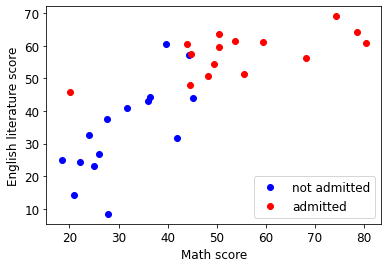

In [5]:
plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro')
plt.xlabel('Math score')
plt.ylabel('English literature score')
plt.legend(('not admitted', 'admitted'))
plt.show()

We'll use `LogisticRegression` class from `sklearn.linear_model` module to solve this problem.


In [6]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(random_state=0)
lreg.fit(X, y)
lreg.score(X, y)

0.9

$0.9$ is quite good result for such a small data.

Now we can do a visualization for decision boundary.

Let's denote our features by $(x_1, x_2)$-ით. Threshold value is $0.5$, so condition for positive class is:  
$$ \frac{1}{1+e^{-w_0 - w_1x_1 - w_2x_2}} \geq 0.5 $$

$$ e^{-w_0 - w_1x_1 - w_2x_2} \leq 1 $$

$$ -w_0 - w_1x_1 - w_2x_2 \leq 0$$

$$ x_2 \geq -\frac{w_0}{w_2} - \frac{w_1}{w_2}x_1 $$

So decision boundary is:  
$$ x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2}x_1 $$

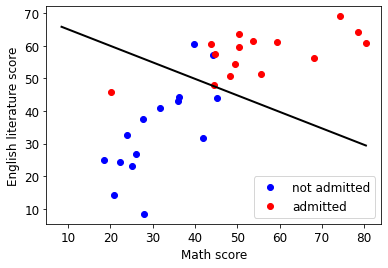

In [7]:
k = -lreg.coef_[0, 0]/lreg.coef_[0, 1]
b = -lreg.intercept_/lreg.coef_[0, 1]

t = np.array([X.min(), X.max()])
plt.plot(X[y==0, 0], X[y==0, 1], 'bo', X[y==1, 0], X[y==1, 1], 'ro')
plt.plot(t, k*t+b, 'k', linewidth=2)
plt.xlabel('Math score')
plt.ylabel('English literature score')
plt.legend(('not admitted', 'admitted'))
plt.show()

## Regularized Logistic Regression

We can use regularization to solve overfitting in logistic regression too(as in linear regression). We add $\frac{\lambda}{2n} \sum_{k=1}^{m}w_k^2$ to cost function to reduce weights.
new cost function:  
$$ J(w) = -\frac{1}{n}\sum_{i=1}^{n} \bigg( y_i \ln p(x_i) + (1-y_i)\ln (1-p(x_i)) \bigg) + \frac{\lambda}{2n} \sum_{k=1}^{m}w_k^2 $$  

partial derivatives (We write seperately partial derivative for $w_0$ because we don't use regularization for it):
$$
\frac{\partial J(w^j) }{\partial w_0^{j}} = \frac{1}{n}\sum_{i=1}^{n} ( p(x_i) - y_i)
$$

$$
\frac{\partial J(w^j) }{\partial w_k^{j}} = \frac{1}{n}\sum_{i=1}^{n} ( p(x_i) - y_i ) x_i + \frac{\lambda}{n}w_k
$$

Let's test regularization using [titanic dataset](https://www.kaggle.com/hesh97/titanicdataset-traincsv)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Rango/data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Here we have some information about titanic passengers and target column is `Survived`.

We don't need name, ticket and passenger id so let's delete them

In [10]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


Check null values:

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

`Cabin` is almost empty so let's delete it, we can delete rows where `Age` and `Embarked` is empty (just for simplicity)

In [12]:
df.drop(columns=['Cabin'], inplace=True)
df.dropna(inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


Now we can do one-hot-encoding for categorical features. We'll use `get_dummies()` method from pandas library for this

In [13]:
df = pd.get_dummies(df, prefix=['Sex', 'Embarked'])

In [14]:
df = pd.concat([df.drop(columns=['Pclass']), pd.get_dummies(df['Pclass'], prefix='Pclass')], axis=1)
df

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,1,0,0,1,0,0,0,1
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,1,0
887,1,19.0,0,0,30.0000,1,0,0,0,1,1,0,0
889,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0


standartization(except target column):

In [15]:
from sklearn.preprocessing import StandardScaler      

scaler = StandardScaler()   
df[df.columns.drop('Survived')] = scaler.fit_transform(df[df.columns.drop('Survived')])  
df

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,-0.527669,0.522511,-0.506787,-0.516380,-0.756138,0.756138,-0.472618,-0.202326,0.534040,-0.590326,-0.566538,1.002813
1,1,0.577094,0.522511,-0.506787,0.694046,1.322511,-1.322511,2.115874,-0.202326,-1.872519,1.693979,-0.566538,-0.997195
2,1,-0.251478,-0.552714,-0.506787,-0.503620,1.322511,-1.322511,-0.472618,-0.202326,0.534040,-0.590326,-0.566538,1.002813
3,1,0.369951,0.522511,-0.506787,0.350326,1.322511,-1.322511,-0.472618,-0.202326,0.534040,1.693979,-0.566538,-0.997195
4,0,0.369951,-0.552714,-0.506787,-0.501257,-0.756138,0.756138,-0.472618,-0.202326,0.534040,-0.590326,-0.566538,1.002813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,0.646142,-0.552714,5.350885,-0.102875,1.322511,-1.322511,-0.472618,4.942527,-1.872519,-0.590326,-0.566538,1.002813
886,0,-0.182430,-0.552714,-0.506787,-0.407687,-0.756138,0.756138,-0.472618,-0.202326,0.534040,-0.590326,1.765108,-0.997195
887,1,-0.734812,-0.552714,-0.506787,-0.086335,1.322511,-1.322511,-0.472618,-0.202326,0.534040,1.693979,-0.566538,-0.997195
889,1,-0.251478,-0.552714,-0.506787,-0.086335,-0.756138,0.756138,2.115874,-0.202326,-1.872519,1.693979,-0.566538,-0.997195


Split dataset:

In [16]:
from sklearn.model_selection import train_test_split

y = df['Survived']
X = df.drop(columns=['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

train model:

In [17]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(random_state=0)
lreg.fit(X_train, y_train)
print('Train accuracy: ', lreg.score(X_train, y_train))
print('Test accuracy: ', lreg.score(X_test, y_test))

Train accuracy:  0.821285140562249
Test accuracy:  0.7663551401869159


Let's see how regularized model works. If we want to use regularization, we should pass prameter $C$ to `LogisticRegression` while initialization ($C = \frac{1}{\lambda}$ )

In [18]:
lreg = LogisticRegression(C=0.2, random_state=0)
lreg.fit(X_train, y_train)
print('Train accuracy: ', lreg.score(X_train, y_train))
print('Test accuracy: ', lreg.score(X_test, y_test))

Train accuracy:  0.8192771084337349
Test accuracy:  0.7710280373831776


We got less accuracy for training set and increased accuracy for test set, this means regularization works.